Данные [тут](https://drive.google.com/file/d/1sSK8nfzCDZsj1m58xLSO_O9THZhn3vIT/view?usp=sharing)

In [ ]:
import sys
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import seaborn as sns
import pylab as plt
import numpy as np

from DataContainers.ExperimentHelper import read_experiments_from_dir
from Drawing.DrawHiggins1D import draw_amps_stat
from Drawing.Draw1D import set_defaults_1D

from DataContainers.Experiment import Experiment

In [3]:
old_data_dir = 'D:\\math\\data\\normal_diffusion_L_from_4_to_160'
results = read_experiments_from_dir(old_data_dir)
set_defaults_1D()

## В предыдущих сериях

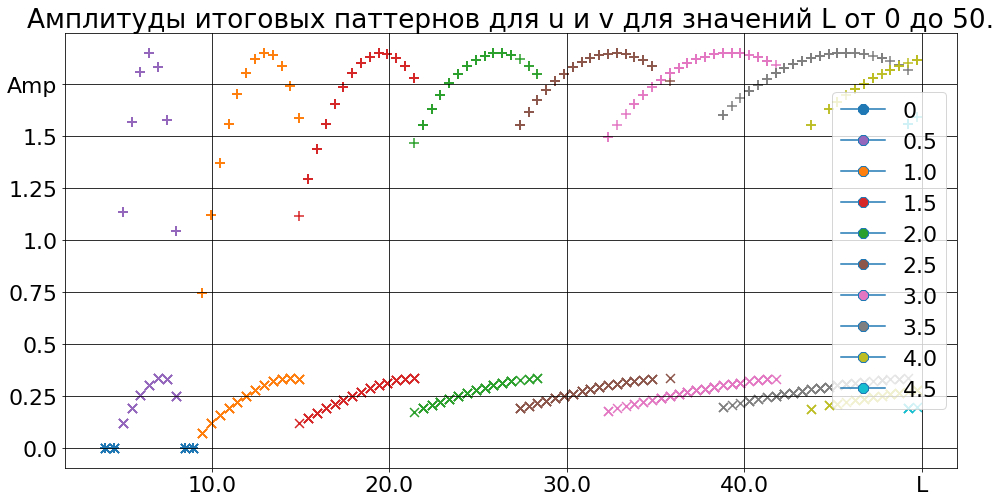

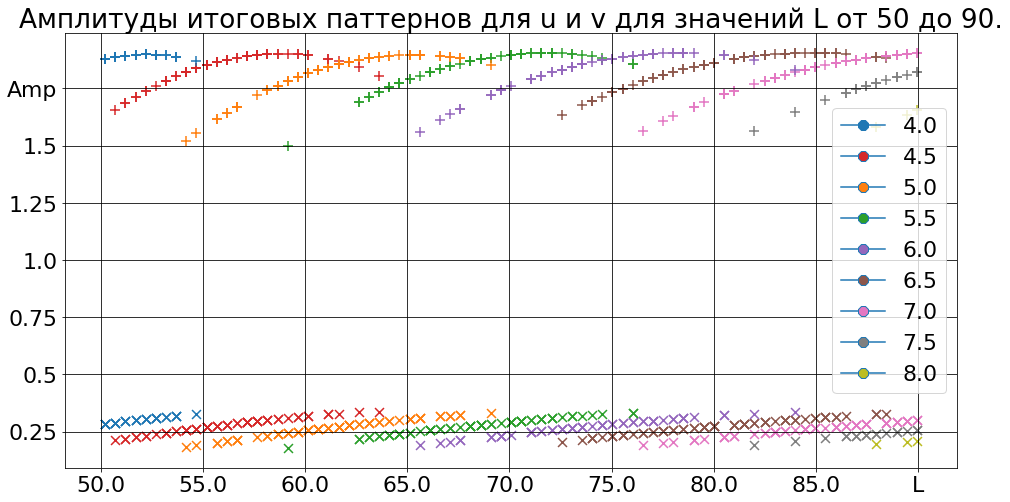

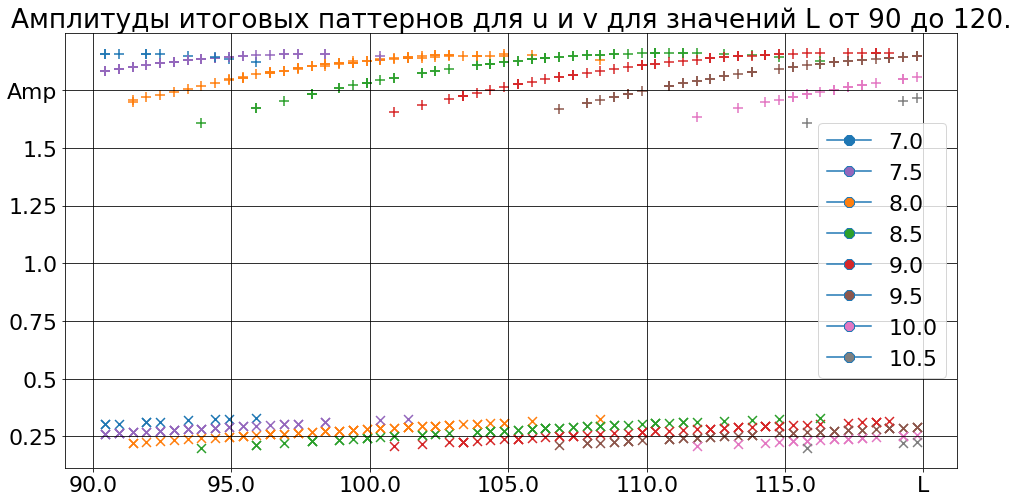

In [4]:
draw_amps_stat(results, 0,50)
draw_amps_stat(results, 50,90)
draw_amps_stat(results, 90,120)

In [5]:
borders = {}
for r in results:
    L = r.method_parameters['x_max']
    peaks = r.metadata['end_picks']['u']['picks']
    if peaks not in borders:
        borders[peaks] = [9999, -1]
    borders[peaks][0] = min(borders[peaks][0], L)
    borders[peaks][1] = max(borders[peaks][1], L)
borders = {k:borders[k] for k in sorted(borders)}
#для 02_11_2020Генерация данных...

## Про удлиннение расчётов

131.68152866242036 (3251, 200)


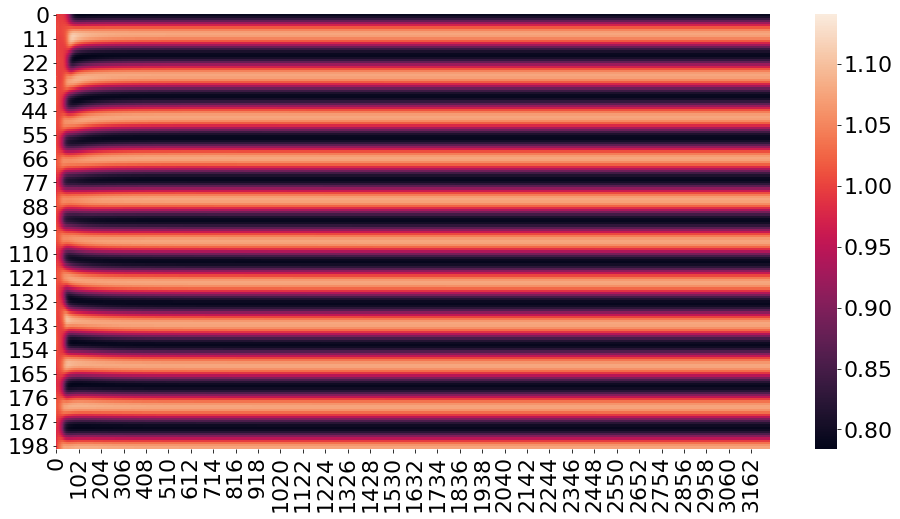

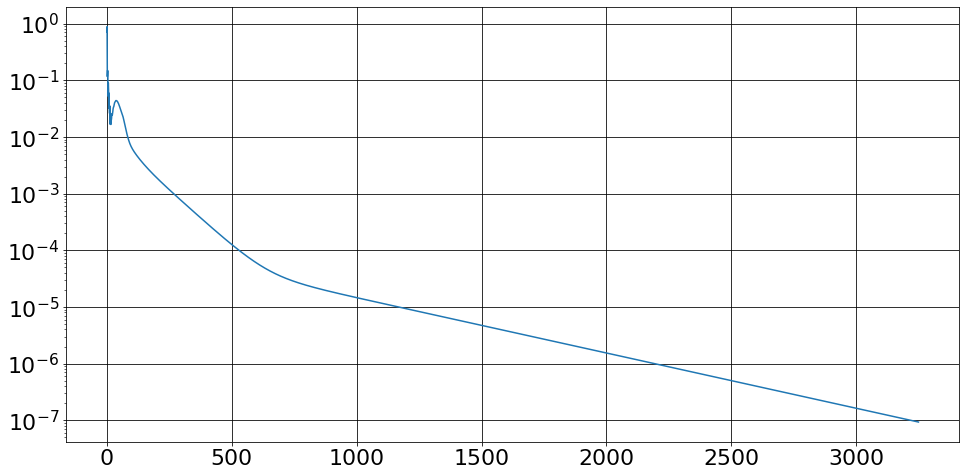

131.68152866242036 (3451, 200)


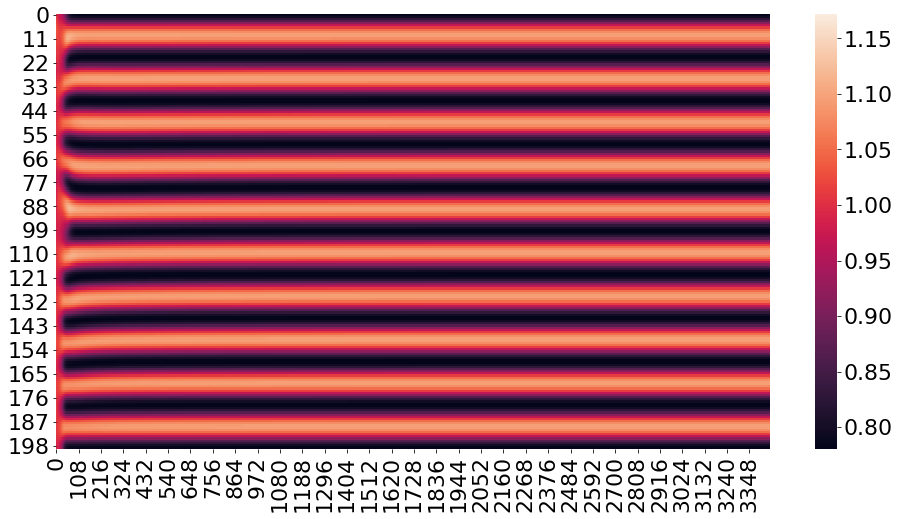

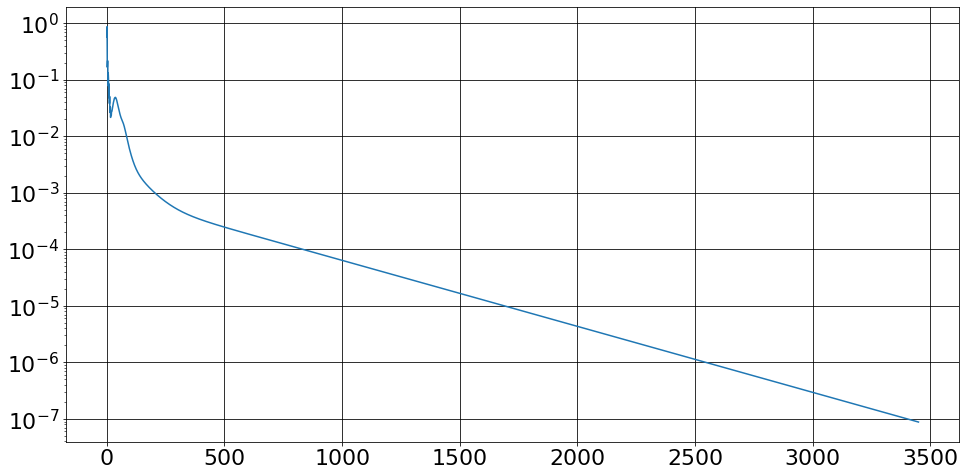

In [6]:
for j in range(2):
    r_0 = Experiment().fill_from_file(f'D:\\math\\data\\normal_diffusion_L_from_4_to_160\\257_{j}', True)
    print(r_0.method_parameters['dx']*len(r_0.init_values['u']), r_0.timelines['u'].shape)
    sns.heatmap(r_0.timelines['u'].T[:,1:])
    plt.show()
    tail = r_0.timelines['u'].T
    tail_shifted = np.zeros(tail.shape)
    tail_shifted[:,1:] = tail[:,:-1]
    plt.plot(np.apply_along_axis(np.linalg.norm,0,(tail-tail_shifted)[:,-tail.shape[1]+1:]))
    plt.yscale('log')
    plt.show()

10.45859872611465 (201, 200)


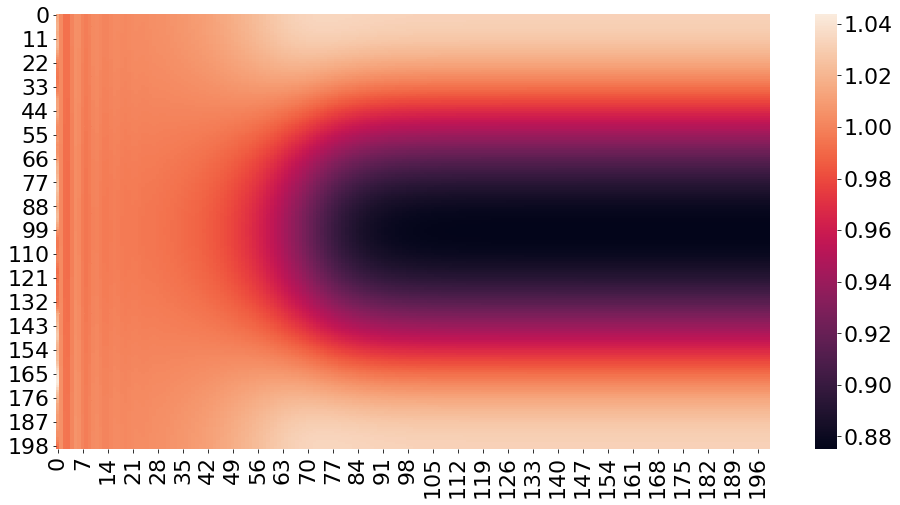

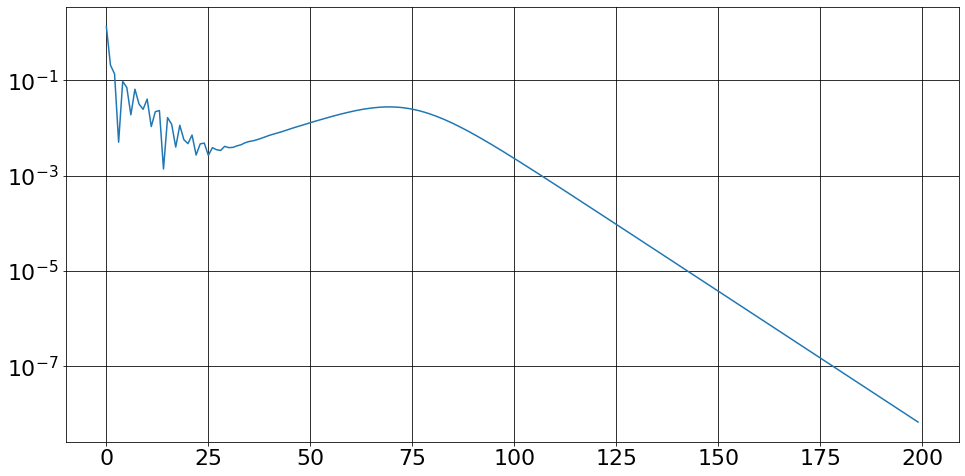

10.45859872611465 (201, 200)


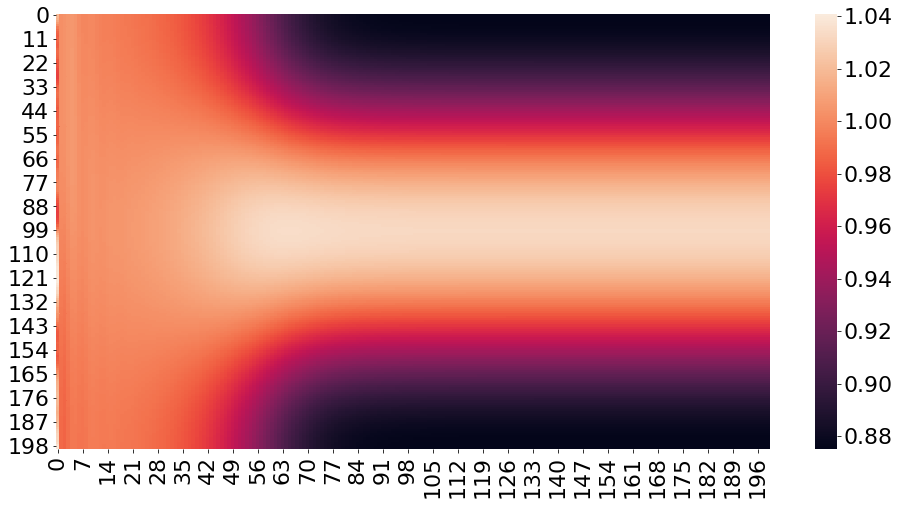

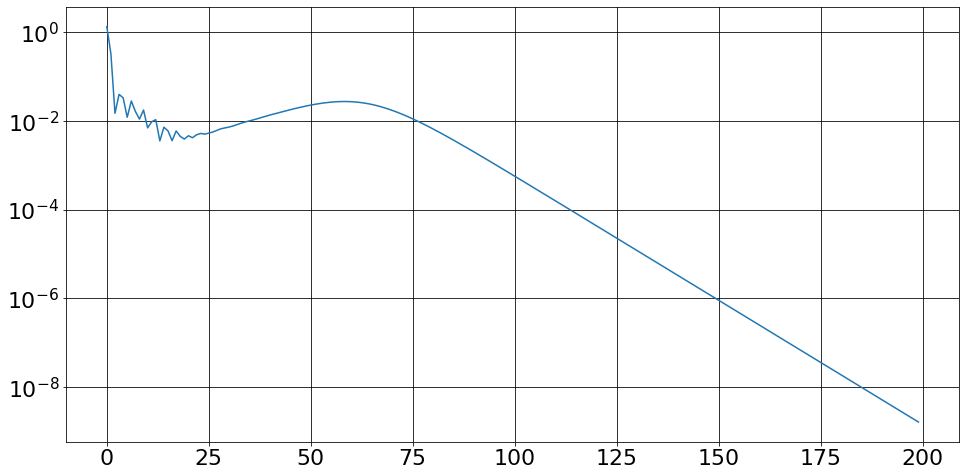

In [16]:
for j in range(2):
    r_1 = Experiment().fill_from_file(f'D:\\math\\data\\normal_diffusion_L_from_4_to_160\\13_{j}', True)
    print(r_1.method_parameters['dx']*len(r_1.init_values['u']), r_1.timelines['u'].shape)
    sns.heatmap(r_1.timelines['u'].T[:,1:])
    plt.show()
    tail = r_1.timelines['u'].T
    tail_shifted = np.zeros(tail.shape)
    tail_shifted[:,1:] = tail[:,:-1]
    plt.plot(np.apply_along_axis(np.linalg.norm,0,(tail-tail_shifted)[:,-tail.shape[1]+1:]))
    plt.yscale('log')
    plt.show()

### Про рождение и смерть

In [8]:
base_dir = 'D:\\math\\data02_11_2020'

In [9]:
data_borders = []
for peaks in np.arange(0,6.5,0.5):
    subir = f'{base_dir}\\{0 if not peaks else peaks}_peaks'
    print(subir)
    data_borders += read_experiments_from_dir(subir, False)

D:\math\data02_11_2020\0_peaks
D:\math\data02_11_2020\0.5_peaks
D:\math\data02_11_2020\1.0_peaks
D:\math\data02_11_2020\1.5_peaks
D:\math\data02_11_2020\2.0_peaks
D:\math\data02_11_2020\2.5_peaks
D:\math\data02_11_2020\3.0_peaks
D:\math\data02_11_2020\3.5_peaks
D:\math\data02_11_2020\4.0_peaks
D:\math\data02_11_2020\4.5_peaks
D:\math\data02_11_2020\5.0_peaks
D:\math\data02_11_2020\5.5_peaks
D:\math\data02_11_2020\6.0_peaks


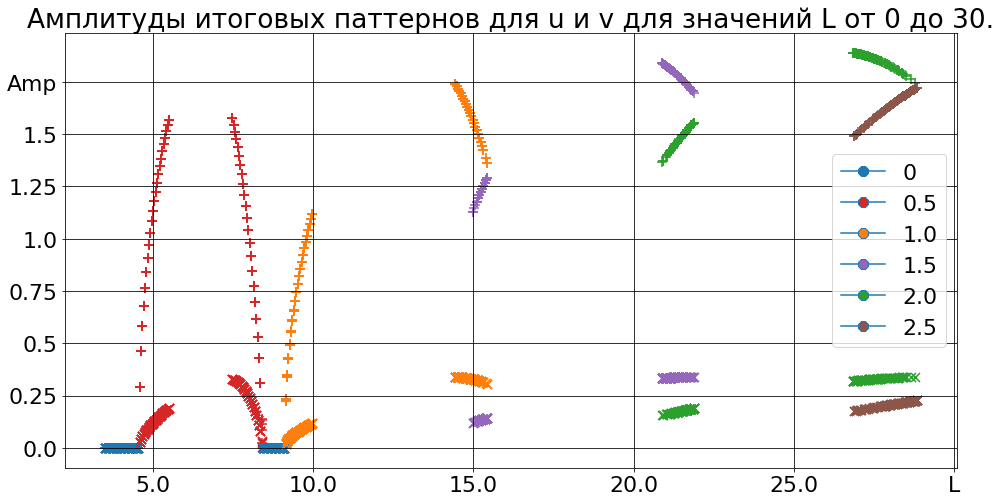

In [22]:
draw_amps_stat(data_borders, 0,30)

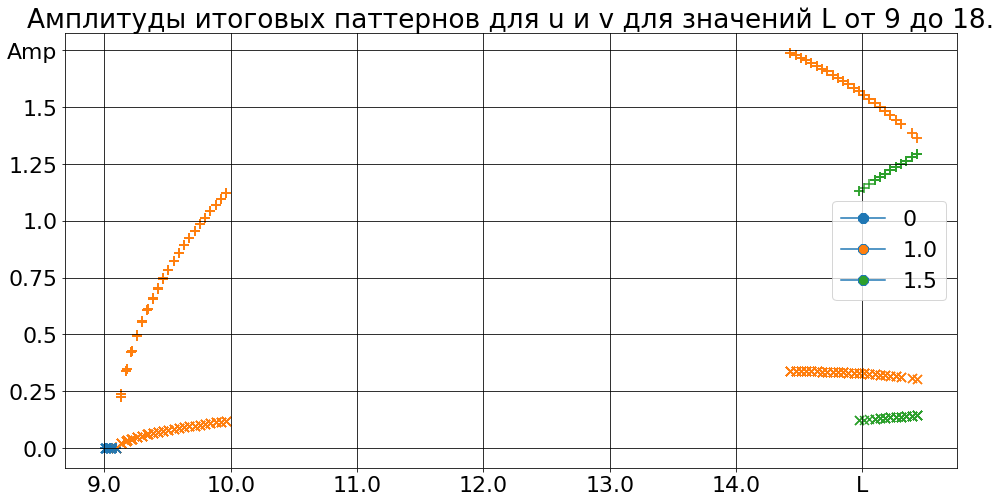

In [11]:
draw_amps_stat(data_borders, 9,18)

In [12]:
data_borders_zoom = []
subir = f'{base_dir}\\death'
data_borders_zoom += read_experiments_from_dir(subir, False)

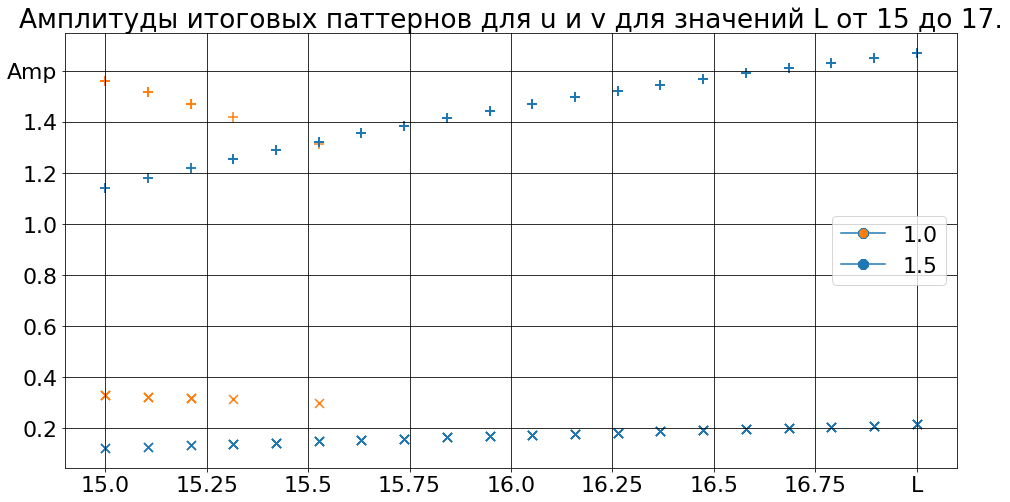

In [13]:
draw_amps_stat(data_borders_zoom, 15,17)

### А если шаг увеличить?

In [31]:
data_borders_zoom_1 = []
subir = f'{base_dir}\\death_1'
data_borders_zoom_1 += read_experiments_from_dir(subir, False)

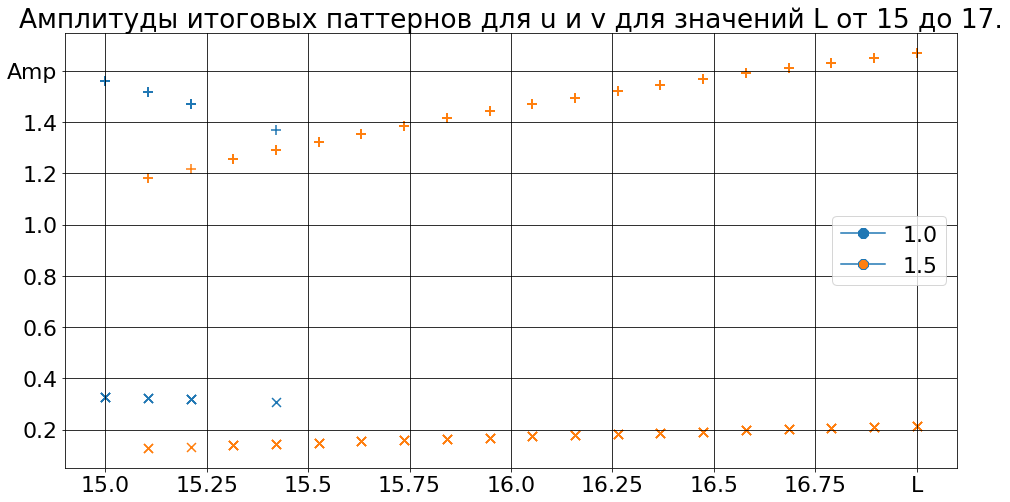

In [32]:
draw_amps_stat(data_borders_zoom_1, 15,17)

### А если ещё шаг увеличить?

In [35]:
data_borders_zoom_3 = []
subir = f'{base_dir}\\death_3'
data_borders_zoom_3 += read_experiments_from_dir(subir, False)

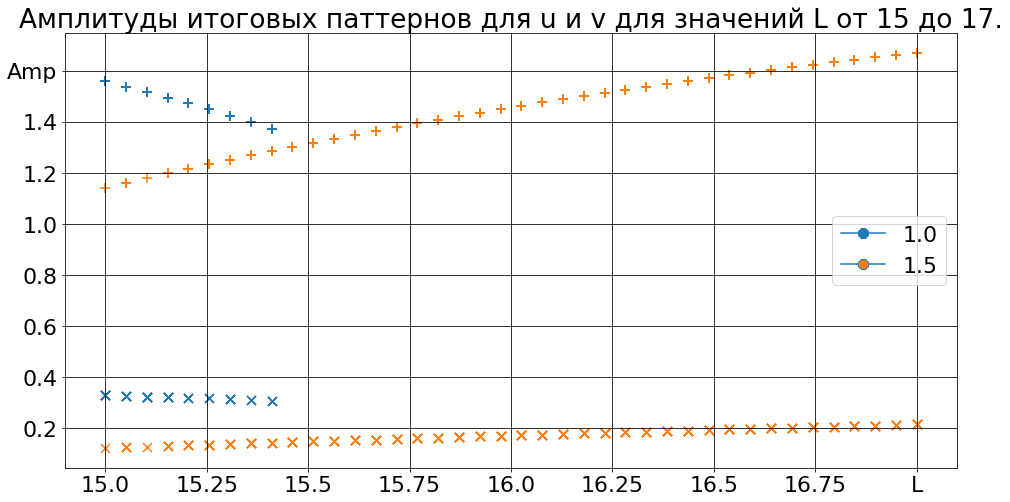

In [36]:
draw_amps_stat(data_borders_zoom_3, 15,17)

### Про ноли слева. Структура - это правда или вычислительные эффекты?

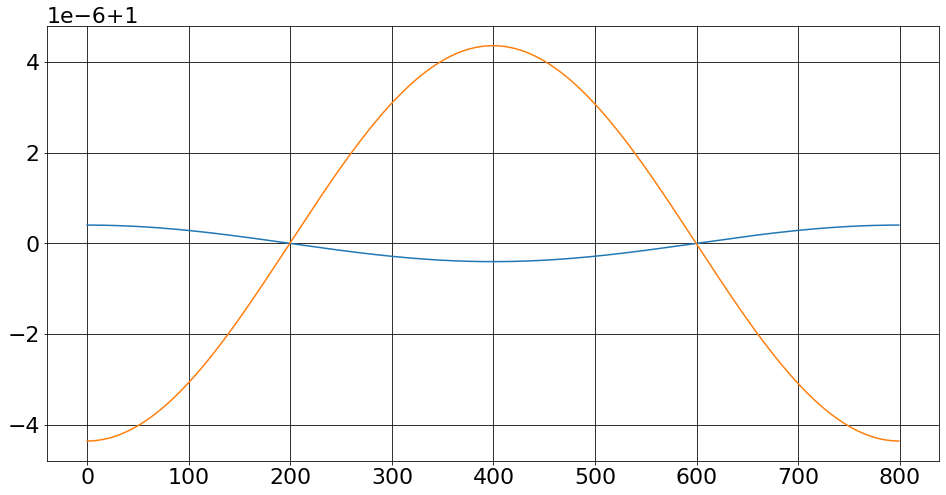

In [14]:
e = Experiment().fill_from_file('D:\\math\\data02_11_2020\\1.0_peaks\\left_0_0')
plt.plot(e.end_values['u'])
plt.plot(e.end_values['v'])
plt.show()

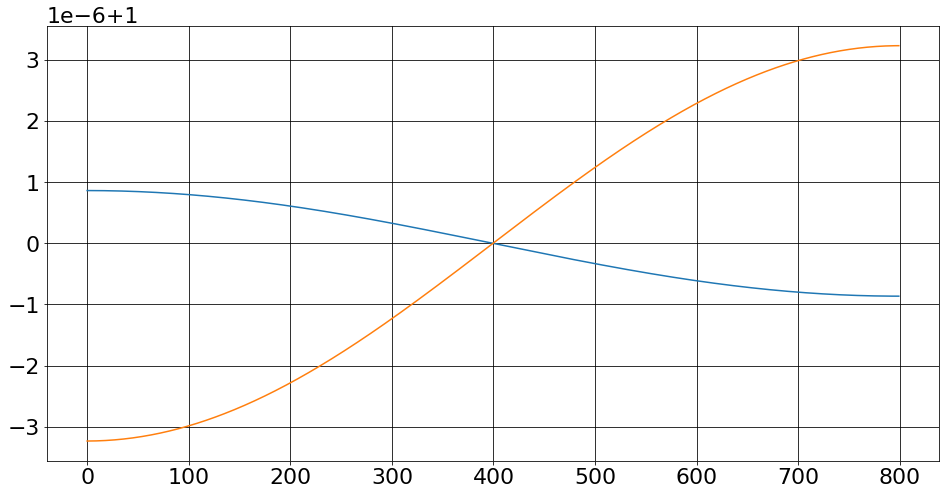

In [15]:
e = Experiment().fill_from_file('D:\\math\\data02_11_2020\\0.5_peaks\\rights_24_4')
plt.plot(e.end_values['u'])
plt.plot(e.end_values['v'])
plt.show()

### Про границу Тьюринга на малой диффузии

In [23]:
subir = f'{base_dir}\\Turing bif for small diffusion'
data_border_Turing = read_experiments_from_dir(subir, False)

[]

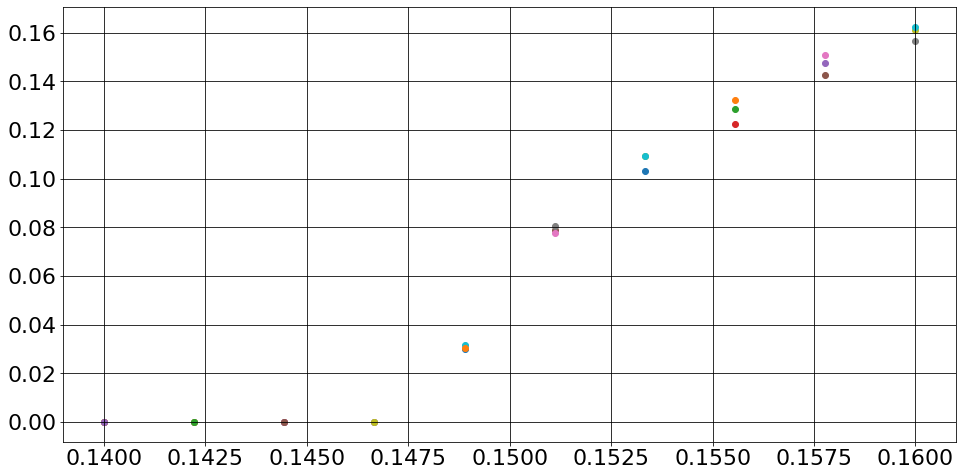

In [24]:
ax = plt.gca()
for e in data_border_Turing:
    amp = max(e.end_values['u']) - min(e.end_values['u'])
    ax.scatter(e.model_config['Du'], amp)
plt.plot()

### Про начало генрации паттернов при малой диффузии

In [25]:
subir = f'{base_dir}\\patterns for small L'
data_aaa = read_experiments_from_dir(subir, False)

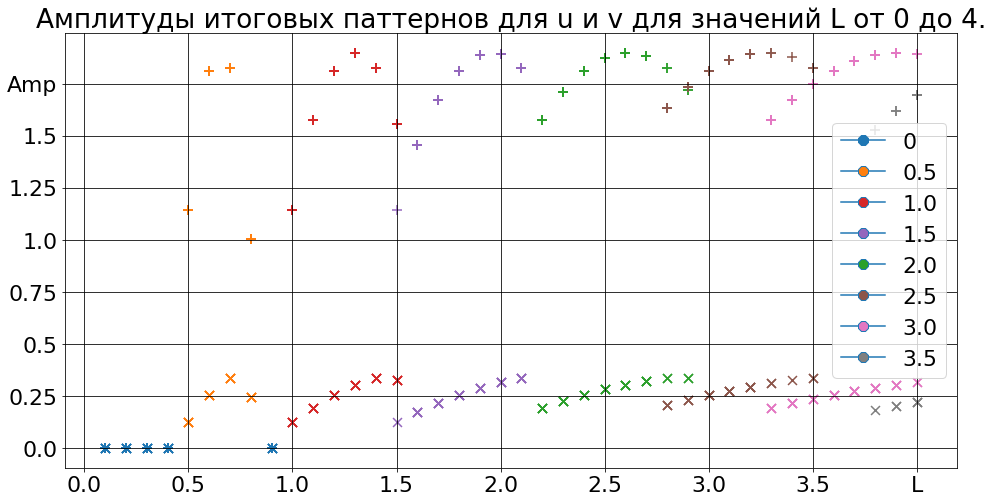

In [26]:
draw_amps_stat(data_aaa, 0,4)

### Про Кранка-Николсона

$$\Large\left\{\begin{array}{c}
\frac{\partial u}{\partial t} = 1 - uv + D_u\frac{\partial^2u}{\partial x^2} \\
\Large\frac{\partial v}{\partial t} = pv(u - \frac{1+q}{q+v}) + D_v\frac{\partial^2 v}{\partial x^2}
\end{array}\right..$$



$$\Large\frac{u^{j+1}_i - u^{j}_i}{\tau} = \frac{D_u}{2}(\frac{u^j_{i-1} - 2 u^j_{i} + u^j_{i+1}}{h^2} + \frac{u^{j+1}_{i-1} - 2 u^{j+1}_{i} + u^{j+1}_{i+1})}{h^2}) + (1-u^j_i v^j_i)+\frac{\partial (1-uv)}{\partial t}\tau 0.5$$




$$\Large\frac{u^{j+1}_i - u^{j}_i}{\tau} = \frac{D_u}{2}(\frac{u^j_{i-1} - 2 u^j_{i} + u^j_{i+1})}{h^2} + \frac{u^{j+1}_{i-1} - 2 u^{j+1}_{i} + u^{j+1}_{i+1})}{h^2}) + (1-u^j_i v^j_i) - (u^j_i\frac{\partial v}{\partial t} + v^j_i\frac{\partial u}{\partial t})\tau 0.5$$




$$\Large\frac{u^{j+1}_i - u^{j}_i}{\tau} = \frac{D_u}{2}(\frac{u^j_{i-1} - 2 u^j_{i} + u^j_{i+1})}{h^2} + \frac{u^{j+1}_{i-1} - 2 u^{j+1}_{i} + u^{j+1}_{i+1})}{h^2}) + (1-u^j_i v^j_i) - (\mathbf{u^j_i}\frac{\mathbf{v^{j+1}_i} - v^{j}_i}{\tau} + \mathbf{v^j_i}\frac{\mathbf{u^{j+1}_i} - u^{j}_i}{\tau})\tau 0.5$$

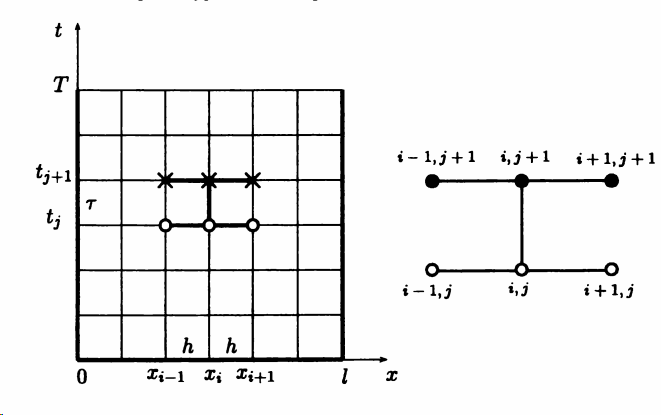